In [1]:
%matplotlib inline
from sklearn.externals import joblib
from sklearn_model_eval import plots
from sklearn_model_eval import tables
import pandas as pd
import numpy as np
import json
from sklearn.metrics import classification_report
from sklearn import cross_validation

In [18]:
model = joblib.load('model/model.pkl') 

with open('model/features.json', "r") as f:
    features = json.load(f)

train_y = np.load('model/train_y.npy').astype(int)
predict_y = np.load('model/predicted_y.npy').astype(int)
predict_scores = np.load('model/predicted_scores.npy')

df_raw = pd.read_csv('raw_data/train.csv', index_col='PassengerId')
df = pd.read_csv('data/train.csv', index_col='id')
df = df.join(df_raw)

train_x = df.drop(['Survived'], axis=1).values

IOError: [Errno 2] No such file or directory: 'model/predicted_scores.npy'

In [3]:
def error_type(y_true, y_predicted):
    if y_true==0 and y_predicted==0:
        return 'TN'
    elif y_true==1 and y_predicted==1:
        return 'TP'
    elif y_true==1 and y_predicted==0:
        return 'FN'
    elif y_true==0 and y_predicted==1:
        return 'FP'
    else:
        return 'E'

In [4]:
pt = [error_type(*t) for t in zip(train_y, predict_y)]
df['pred_type'] = pt
df.head()

,age,fare,parents_and_children,p_class,siblings_and_spouses,survived,fam_size,fam_mul_size,fare_mul_pclass,fare_mul_age,...,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,pred_type
id,,,,,,,,,,,,,,,,,,,,,
1,22,7.2500,0,3,1,0,1,0,2.416667,159.5000,...,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,TN
2,38,71.2833,0,1,1,1,1,0,71.283300,2708.7654,...,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,TP
3,26,7.9250,0,3,0,1,0,0,2.641667,206.0500,...,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,TP
4,35,53.1000,0,1,1,1,1,0,53.100000,1858.5000,...,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,TP
5,35,8.0500,0,3,0,0,0,0,2.683333,281.7500,...,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,TN


In [5]:
df.describe()

,age,fare,parents_and_children,p_class,siblings_and_spouses,survived,fam_size,fam_mul_size,fare_mul_pclass,fare_mul_age,...,sex_female,sex_male,social_status_high,social_status_normal,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,29.188182,32.204208,0.381594,2.308642,0.523008,0.383838,0.904602,0.567901,25.046650,1022.118312,...,0.352413,0.647587,0.051627,0.948373,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,13.337887,49.693429,0.806057,0.836071,1.102743,0.486592,1.613459,1.979287,51.245594,1837.298581,...,0.477990,0.477990,0.221398,0.221398,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.641667,193.750000,...,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,26.000000,14.454200,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,6.325000,354.200000,...,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,36.000000,31.000000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,23.183333,1115.550000,...,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,80.000000,512.329200,6.000000,3.000000,8.000000,1.000000,10.000000,16.000000,512.329200,18443.851200,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df[df.pred_type=='FP']

,age,fare,parents_and_children,p_class,siblings_and_spouses,survived,fam_size,fam_mul_size,fare_mul_pclass,fare_mul_age,...,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,pred_type
id,,,,,,,,,,,,,,,,,,,,,
265,22,7.7500,0,3,0,0,0,0,2.583333,170.500,...,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q,FP
529,39,7.9250,0,3,0,0,0,0,2.641667,309.075,...,"Salonen, Mr. Johan Werner",male,39,0,0,3101296,7.9250,NaN,S,FP
575,16,8.0500,0,3,0,0,0,0,2.683333,128.800,...,"Rush, Mr. Alfred George John",male,16,0,0,A/4. 20589,8.0500,NaN,S,FP
827,25,56.4958,0,3,0,0,0,0,18.831933,1412.395,...,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S,FP


In [7]:
df[df.pred_type=='FP'].describe()

,age,fare,parents_and_children,p_class,siblings_and_spouses,survived,fam_size,fam_mul_size,fare_mul_pclass,fare_mul_age,...,sex_female,sex_male,social_status_high,social_status_normal,Survived,Pclass,Age,SibSp,Parch,Fare
count,4.000000,4.000000,4,4,4,4,4,4,4.000000,4.00000,...,4.00,4.00,4,4,4,4,2.000000,4,4,4.000000
mean,25.500000,20.055200,0,3,0,0,0,0,6.685067,505.19250,...,0.25,0.75,0,1,0,3,27.500000,0,0,20.055200
std,9.746794,24.294045,0,0,0,0,0,0,8.098015,609.69086,...,0.50,0.50,0,0,0,0,16.263456,0,0,24.294045
min,16.000000,7.750000,0,3,0,0,0,0,2.583333,128.80000,...,0.00,0.00,0,1,0,3,16.000000,0,0,7.750000
25%,20.500000,7.881250,0,3,0,0,0,0,2.627083,160.07500,...,0.00,0.75,0,1,0,3,21.750000,0,0,7.881250
50%,23.500000,7.987500,0,3,0,0,0,0,2.662500,239.78750,...,0.00,1.00,0,1,0,3,27.500000,0,0,7.987500
75%,28.500000,20.161450,0,3,0,0,0,0,6.720483,584.90500,...,0.25,1.00,0,1,0,3,33.250000,0,0,20.161450
max,39.000000,56.495800,0,3,0,0,0,0,18.831933,1412.39500,...,1.00,1.00,0,1,0,3,39.000000,0,0,56.495800


In [8]:
df[df.pred_type=='FN']

,age,fare,parents_and_children,p_class,siblings_and_spouses,survived,fam_size,fam_mul_size,fare_mul_pclass,fare_mul_age,...,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,pred_type
id,,,,,,,,,,,,,,,,,,,,,
37,25,7.2292,0,3,0,1,0,0,2.409733,180.730,...,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,FN
108,25,7.7750,0,3,0,1,0,0,2.591667,194.375,...,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S,FN
227,19,10.5000,0,2,0,1,0,0,5.250000,199.500,...,"Mellors, Mr. William John",male,19,0,0,SW/PP 751,10.5000,NaN,S,FN
268,25,7.7750,0,3,1,1,1,0,2.591667,194.375,...,"Persson, Mr. Ernst Ulrik",male,25,1,0,347083,7.7750,NaN,S,FN
284,19,8.0500,0,3,0,1,0,0,2.683333,152.950,...,"Dorking, Mr. Edward Arthur",male,19,0,0,A/5. 10482,8.0500,NaN,S,FN
289,42,13.0000,0,2,0,1,0,0,6.500000,546.000,...,"Hosono, Mr. Masabumi",male,42,0,0,237798,13.0000,NaN,S,FN
580,32,7.9250,0,3,0,1,0,0,2.641667,253.600,...,"Jussila, Mr. Eiriik",male,32,0,0,STON/O 2. 3101286,7.9250,NaN,S,FN
674,31,13.0000,0,2,0,1,0,0,6.500000,403.000,...,"Wilhelms, Mr. Charles",male,31,0,0,244270,13.0000,NaN,S,FN
829,25,7.7500,0,3,0,1,0,0,2.583333,193.750,...,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q,FN


In [9]:
df[df.pred_type=='FN'].describe()

,age,fare,parents_and_children,p_class,siblings_and_spouses,survived,fam_size,fam_mul_size,fare_mul_pclass,fare_mul_age,...,sex_female,sex_male,social_status_high,social_status_normal,Survived,Pclass,Age,SibSp,Parch,Fare
count,9.000000,9.000000,9,9.000000,9.000000,9,9.000000,9,9.000000,9.000000,...,9,9,9,9,9,9.000000,6.000000,9.000000,9,9.000000
mean,27.000000,9.222689,0,2.666667,0.111111,1,0.111111,0,3.750156,257.586667,...,0,1,0,1,1,2.666667,28.000000,0.111111,0,9.222689
std,7.158911,2.333487,0,0.500000,0.333333,0,0.333333,0,1.788228,130.690269,...,0,0,0,0,0,0.500000,8.854377,0.333333,0,2.333487
min,19.000000,7.229200,0,2.000000,0.000000,1,0.000000,0,2.409733,152.950000,...,0,1,0,1,1,2.000000,19.000000,0.000000,0,7.229200
25%,25.000000,7.775000,0,2.000000,0.000000,1,0.000000,0,2.591667,193.750000,...,0,1,0,1,1,2.000000,20.500000,0.000000,0,7.775000
50%,25.000000,7.925000,0,3.000000,0.000000,1,0.000000,0,2.641667,194.375000,...,0,1,0,1,1,3.000000,28.000000,0.000000,0,7.925000
75%,31.000000,10.500000,0,3.000000,0.000000,1,0.000000,0,5.250000,253.600000,...,0,1,0,1,1,3.000000,31.750000,0.000000,0,10.500000
max,42.000000,13.000000,0,3.000000,1.000000,1,1.000000,0,6.500000,546.000000,...,0,1,0,1,1,3.000000,42.000000,1.000000,0,13.000000


In [10]:
df[df.pred_type=='FN'].describe()

,age,fare,parents_and_children,p_class,siblings_and_spouses,survived,fam_size,fam_mul_size,fare_mul_pclass,fare_mul_age,...,sex_female,sex_male,social_status_high,social_status_normal,Survived,Pclass,Age,SibSp,Parch,Fare
count,9.000000,9.000000,9,9.000000,9.000000,9,9.000000,9,9.000000,9.000000,...,9,9,9,9,9,9.000000,6.000000,9.000000,9,9.000000
mean,27.000000,9.222689,0,2.666667,0.111111,1,0.111111,0,3.750156,257.586667,...,0,1,0,1,1,2.666667,28.000000,0.111111,0,9.222689
std,7.158911,2.333487,0,0.500000,0.333333,0,0.333333,0,1.788228,130.690269,...,0,0,0,0,0,0.500000,8.854377,0.333333,0,2.333487
min,19.000000,7.229200,0,2.000000,0.000000,1,0.000000,0,2.409733,152.950000,...,0,1,0,1,1,2.000000,19.000000,0.000000,0,7.229200
25%,25.000000,7.775000,0,2.000000,0.000000,1,0.000000,0,2.591667,193.750000,...,0,1,0,1,1,2.000000,20.500000,0.000000,0,7.775000
50%,25.000000,7.925000,0,3.000000,0.000000,1,0.000000,0,2.641667,194.375000,...,0,1,0,1,1,3.000000,28.000000,0.000000,0,7.925000
75%,31.000000,10.500000,0,3.000000,0.000000,1,0.000000,0,5.250000,253.600000,...,0,1,0,1,1,3.000000,31.750000,0.000000,0,10.500000
max,42.000000,13.000000,0,3.000000,1.000000,1,1.000000,0,6.500000,546.000000,...,0,1,0,1,1,3.000000,42.000000,1.000000,0,13.000000


In [11]:
print(classification_report(train_y, predict_y, target_names=['Not survived', 'Survived']))

              precision    recall  f1-score   support

Not survived       0.98      0.99      0.99       549
    Survived       0.99      0.97      0.98       342

 avg / total       0.99      0.99      0.99       891



/Users/Edu/Envs/sklearn_model_eval/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


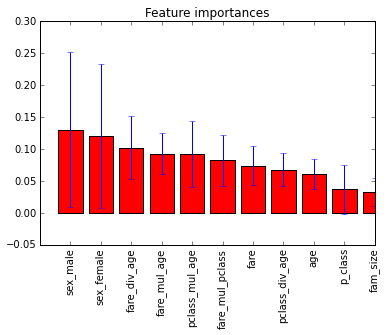

In [12]:
plots.feature_importance(model, features)

In [13]:
tables.feature_importances(model, features)

name,importance,std
sex_male,0.130496,0.121147
sex_female,0.119978,0.113127
fare_div_age,0.102264,0.0494655
fare_mul_age,0.0927848,0.0318357
pclass_mul_age,0.0922766,0.051091
fare_mul_pclass,0.0821204,0.0403248
fare,0.0741329,0.0299099
pclass_div_age,0.0677291,0.0258095
age,0.0606519,0.0230871
p_class,0.0367528,0.0386757


In [14]:
df.pred_type.value_counts()

TN    545
TP    333
FN      9
FP      4
Name: pred_type, dtype: int64

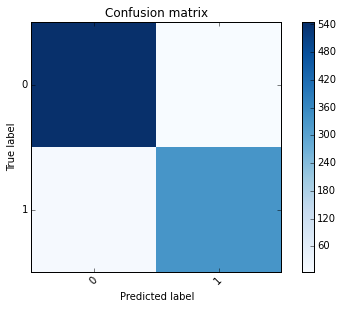

In [15]:
plots.confusion_matrix_(train_y, predict_y, target_names=[0,1])

In [16]:
plots.precision_recall(train_y, predict_scores[:,1])

NameError: name 'predict_scores' is not defined

In [17]:
plots.roc(train_y, predict_scores[:,1])

NameError: name 'predict_scores' is not defined